In [1]:
import cv2 as cv
from pathlib import Path
from fastai.vision.utils import get_image_files
from os import getenv
from PIL import Image
from matplotlib import pyplot as plt
from math import isclose
from itertools import combinations
from pdb import set_trace
import numpy as np

In [2]:
data_url=Path(getenv("HOME"))/".fastai/data/kaggle-chess/test"
board_urls = get_image_files(data_url)

In [3]:
def line_filter(lines): 
    return [isclose(line[1], 0, rel_tol=1e-4) 
            or isclose(line[1], np.pi/2, rel_tol=1e-4) 
            for line in lines]

In [4]:
def draw_hough_lines(img, lines):
    lines = lines[line_filter(lines)]
    lines = lines[lines[:, 0].argsort()[::-1]]
    for line in lines:
        rho, theta = list(line)
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(img, (x1, y1), (x2, y2), (0, 255, 255), 1)
    return img

In [5]:
def show_pipeline(img_url, resize=(500, 500)):
    img = Image.open(img_url).resize(resize)
    gray = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY)
    edges = cv.Canny(gray, 4000, 5000, apertureSize=7)
    fig = plt.figure(figsize=(15, 15))
    gs = fig.add_gridspec(3, 3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(img)
    ax1.set_title("original")
    
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(gray, cmap='gray')
    ax2.set_title('grayscale')
    
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.imshow(edges, cmap='gray')
    ax3.set_title("edges")
    
    ax4 = fig.add_subplot(gs[1:, 0:])
    lines = cv.HoughLines(edges, 3, np.pi/180, 150).reshape((-1, 2))
    line_img = draw_hough_lines(np.ones(img.shape), lines)
    ax4.imshow(line_img, cmap='gray')
    ax4.set_title("Hough Lines")
    return lines

In [6]:
cv.__version__

'4.5.1'

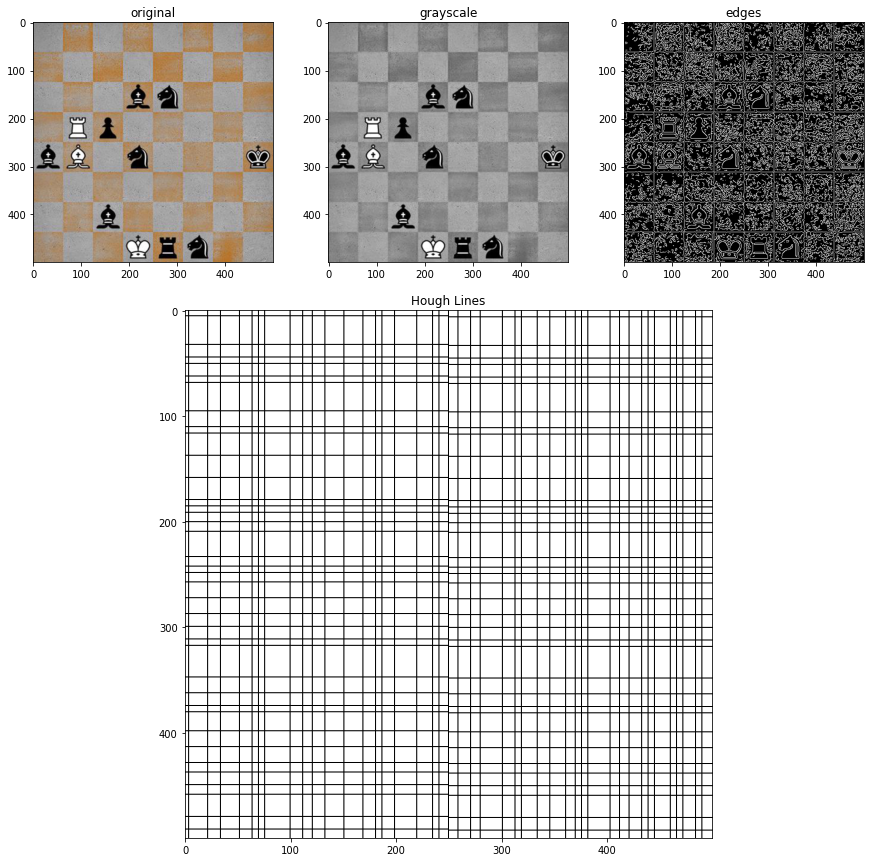

In [15]:
board_url = "/Users/id/.fastai/data/chess_screenshots/test/ft_com_png.rf.d1473adc8406216e85a5d02f384aefe5.jpg"
lines = show_pipeline(board_urls[5])